# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Canvas by **5pm on Thursday June 13th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

Rebecca cares about [octopuses](https://english.stackexchange.com/questions/270/what-is-the-correct-plural-of-octopus/271). She cares so much that, up and down the coast, she opens octopus rescues, octopus temporary housing, and octopus sanctuaries, specifically targeted at juveniles in need. For convenience, we will refer to all the Juvenile Octopus Rescues, Temps, and Sanctuaries as "JORTS."

Rebecca wants to estimate the average food consumption across the JORTS this month so that she can plan the food orders for next month. She has 14 Rescues, 35 Temporary houses, and 56 Sanctuaries. What an empire!

Rebecca opens up the *JORTS Manager App* on her phone, which gives her a list of all of her coastal operations. She randomly picks 15 of them, and gets ready to email their managers asking for the monthly food reports. Of course, Rebecca has taken CSCI 3022, so she knows a thing or two about sampling, and so, to get a good estimate of the monthly food consumption (kilograms per month) for typical JORTS, she intentionally chooses 2 Rescues, 5 Temporary houses, and 8 Sanctuaries.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

1) Population: JORTS Facilities

2) Sample Frame: Rescues, Temporary Houses, and Sanctuaries owned by JORTS

3) Sample: 15 randomly selected JORTS facilities, 2 being rescues, 5 being temporary houses, and 8 being sancuaries

4) Type of Sample: Stratified Sampling

5) Quality of Interest: Monthly Food Consumption (in Kilograms)

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ changes. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
y \quad
4.2 \quad
1.9
$$

**Part A**: Compute the sample mean and sample median for $y=0$. Compute them both again for $y=10$.

In [83]:
Number_set=[4.6,5.0,6.5,7.7,0,4.2,1.9] #y automatically is 0
arr_length=len(Number_set)
def medianFunction(sort): #function to handle medians
    if arr_length%2==1: #if case for possible code reuse as needed later
        index=(arr_length/2)-0.5
        median=sort[int(index)] #arr_length/2=3.5, but value spot 4 is arr[3], so subtract 0.5 instead of add
        return median
    else:
        median=0 #placeholder, as this is not possible here

#-----------------------Mean for y=0-------------------
summation=0
for i in Number_set:
    summation=summation+i #sums the items together
zerosum=summation #sets the sum at 0
mean_zero=summation/arr_length
print("Mean with Y=0: {}".format(mean_zero))

#----------------------Median for y=0----------------------
zerosort=Number_set.copy() #https://stackoverflow.com/questions/2612802/how-to-clone-or-copy-a-list
zerosort.sort() #sort the items
median=medianFunction(zerosort)
print("Median with Y=10: {}".format(median))

#-----------------------y=10---------------------------------
tensort=Number_set.copy() #copy so I can keep sorting with different y on Number_set
tensort[4]=10#reset y to 10

#---------------------Mean for y=10--------------------------
summation=zerosum+y #take summation at 0, add the value
mean_ten=summation/arr_length #Mean=sum/number of items
print("Mean with Y=10: {}".format(mean_ten))

#---------------------Median for y=10-----------------------
tensort.sort() #sort the items
median=medianFunction(tensort)
print("Median with Y=10: {}".format(median))

Mean with Y=0: 4.271428571428571
Median with Y=10: 4.6
Mean with Y=10: 5.7
Median with Y=10: 5.0


**Part B**: What should $y$ be if we want the mean to be equal to $10$? What should $y$ be if we want the mean to be equal to $0$?

In [47]:
mean=10 #Stipulation
summation=mean*arr_length #removing the length to get the sum
for i in Number_set:
    summation=summation-i #remove each value at y=0 to get the remaining value, the new Y
print("y value for Mean=10: {}".format(summation))

y value for Mean=10: 40.1


**Part C**: Compute the sample median for the following cases: 
- $y=10$ 
- $y=100$ 
- $y \to \infty$ 
- $y=5.01$ 
- $y=4.99$

In [62]:
def sortingFunction(value): #sorts the copied array following the given value
    placeholderSet=Number_set.copy()
    placeholderSet[4]=value
    placeholderSet.sort()
    return placeholderSet
def totalMedian(value): #handles getting the median by calling the sorter and median getter
    placeholderSet=sortingFunction(value)
    median=medianFunction(placeholderSet)
    return median
#--------------------y=10--------------------------------------
print("The median at y=10 is: {}".format(totalMedian(10)))
      
#--------------------y=100-------------------------------------
print("The median at y=100 is: {}".format(totalMedian(100)))

#--------------------y=Infinity-------------------------------------
print("The median at y=Infinity is: {}".format(totalMedian(float("inf")))) 
#https://stackoverflow.com/questions/7781260/how-can-i-represent-an-infinite-number-in-python

#--------------------y=5.01-------------------------------------
print("The median at y=5.01 is: {}".format(totalMedian(5.01)))

#--------------------y=4.99-------------------------------------
print("The median at y=4.99 is: {}".format(totalMedian(4.99)))



The median at y=10 is: 5.0
The median at y=100 is: 5.0
The median at y=Infinity is: 5.0
The median at y=100 is: 5.0
The median at y=100 is: 4.99


**Part D**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on?

By Varying y, the mean covers the middle of the data by essentially putting a blanket over all the data. This blanket,
  however. stretches the further it is pulled by outliers. The same place in the design of the blanket is warped further
    by those pulling it until it is likely there isnt even a number under that center anymore.
    
By varying the y, the median hits the middle value of the data no matter how far away the outlier is. The method looks at the
    data and removes the super large and super small first then hones in on that center point.

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

$\frac{1}{n}$ $\sum_{k=1}^{n}x_k$ = $\bar{x}_{n-1}$ + $\frac{x_n - \bar{x}_{n-1}}{n}$

$\sum_{k=1}^{n}x_k$ = n$\bar{x}_{n-1}$ + $x_n$ - $\bar{x}_{n-1}$

$\sum_{k=1}^{n}x_k$ = n-1$\bar{x}_{n-1}$ + $x_n$

$\sum_{k=1}^{n}x_k$ = $\frac{n-1}{n-1}$ $\sum_{k=1}^{n-1}x_k$ + $x_n$

$\sum_{k=1}^{n}x_k$ = $\sum_{k=1}^{n-1}x_k$ + $x_n$

$x_n$ = $x_n$

(it has been a very long time since I have done this kind of math and I do not have the laptop to submit if I went in to ask for help. I am willing to lose some points here at this point)

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [78]:
def my_sample_mean(numpyArr):
    arrayLength=len(numpyArr) #The n for 1/n
    summation=numpyArr.sum() #Convenient sum so I do not need to use a loop
    meanData=summation/arrayLength #Mean calculation
    return meanData

def my_sample_var(numpyArr):
    mean=my_sample_mean(numpyArr) #Get the mnean to use
    arrayDivisor=len(numpyArr)-1 #The n-1 for 1/n-1 in the equatiom
    summation=0
    for i in numpyArr: #loops each value and sums the values minus the means squared
        number=i-mean
        number=np.square(number)
        summation=summation+number
    Variation=summation/arrayDivisor #fimal touch to get the variace
    return Variation 

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the counts of perfectly round suckers found on a set of aquarium octopuses.

`octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]`

In [79]:
numpyArr=np.array([25,29,40,19,7,6,3,11,19,21,22,45,27])
mean=my_sample_mean(numpyArr)
variance=my_sample_var(numpyArr)

print("The mean is: {}".format(mean))
print("The variance is: {}".format(variance))

The mean is: 21.076923076923077
The variance is: 158.91025641025644


**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first suckers count, the first two suckers counts, the first three suckers counts, and so on up to all the suckers counts. Store your means in a numpy array called `sucker_means`.

In [82]:
numpyArr=np.array([25,29,40,19,7,6,3,11,19,21,22,45,27]) #array for personal mental checking
def update_mean(n,xn,meanxn):
    if(n==1):
        return xn #base case no previous mean
    mainMath=(xn-meanxn)/n
    mean=mainMath+meanxn #Equation
    return mean

n=1
meanxn=0 #meanxn is mean of x at n-1; you just cannot put -1 in a name
sucker_means=np.zeros(len(numpyArr)) #fill with 0
for i in numpyArr:
    meanxn=update_mean(n,i,meanxn) #call and update current mean
    sucker_means[n-1]=meanxn 
    print("Mean at n={} is {}".format(n,meanxn))
    n=n+1 

Mean at n=1 is 25
Mean at n=2 is 27.0
Mean at n=3 is 31.333333333333332
Mean at n=4 is 28.25
Mean at n=5 is 24.0
Mean at n=6 is 21.0
Mean at n=7 is 18.428571428571427
Mean at n=8 is 17.5
Mean at n=9 is 17.666666666666668
Mean at n=10 is 18.0
Mean at n=11 is 18.363636363636363
Mean at n=12 is 20.583333333333332
Mean at n=13 is 21.076923076923077


### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [101]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

For Class Warfare, we should expect to see more survivors per one class value with respects to the population of that class on board.

For Male Chivalry, we should expect to see more survivors being women rather than men, as the chivalrous thing to do is for a guy to give up his seat for a lady. I would say that best defines chivalry, as such, that will be my basis for looking at chivalry in the data. Both ideas could have occurred at the same time, however, as even the most chivalrous men can have class bias and give their seats to a lady within their own class.

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [104]:
dfTitanic=df.dropna(subset=["Survived","Pclass","Age","Sex"])
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 888
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          165 non-null object
Embarked       713 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


**Part C**: Determine the fraction of survivors from each passenger class. 

In [121]:
#-------------------Survivors per class-------------------------
classOne=dfTitanic.loc[dfTitanic["Pclass"]==1,"Survived"].sum()
classTwo=dfTitanic.loc[dfTitanic["Pclass"]==2,"Survived"].sum()
classThree=dfTitanic.loc[dfTitanic["Pclass"]==3,"Survived"].sum()

#-------------------Total people per class-------------------------
totalOne=dfTitanic.loc[dfTitanic["Pclass"]==1,"Pclass"].sum()
totalTwo=dfTitanic.loc[dfTitanic["Pclass"]==2,"Pclass"]
totalThree=dfTitanic.loc[dfTitanic["Pclass"]==3,"Pclass"]

#-------------------Survivors per population by class--------------
fracOne=(classOne/totalOne)*100
fracTwo=(classTwo/len(totalTwo))*100
fracThree=(classThree/len(totalThree))*100

print("In class 1, {} out of {} survived, which is {}%".format(classOne,totalOne,fracOne))
print("In class 2, {} out of {} survived, which is {}%".format(classTwo,len(totalTwo),fracTwo))
print("In class 3, {} out of {} survived, which is {}%".format(classThree,len(totalThree),fracThree))

In class 1, 108 out of 168 survived, which is 64.28571428571429%
In class 2, 70 out of 145 survived, which is 48.275862068965516%
In class 3, 101 out of 401 survived, which is 25.187032418952622%


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [154]:
#M refers to male, F refers to female, and written out numbers refer to the class
#----------------------Class 1--------------------------------------
classOneM=dfTitanic.loc[(dfTitanic["Pclass"]==1)&(dfTitanic["Sex"]=="male"), "Survived"].sum()
totalOneM=len(dfTitanic.loc[(dfTitanic["Pclass"]==1)&(dfTitanic["Sex"]=="male")])
classOneF=dfTitanic.loc[(dfTitanic["Pclass"]==1)&(dfTitanic["Sex"]=="female"), "Survived"].sum()
totalOneF=len(dfTitanic.loc[(dfTitanic["Pclass"]==1)&(dfTitanic["Sex"]=="female")])

#----------------------Class 2--------------------------------------
classTwoM=dfTitanic.loc[(dfTitanic["Pclass"]==2)&(dfTitanic["Sex"]=="male"), "Survived"].sum()
totalTwoM=len(dfTitanic.loc[(dfTitanic["Pclass"]==2)&(dfTitanic["Sex"]=="male")])
classTwoF=dfTitanic.loc[(dfTitanic["Pclass"]==2)&(dfTitanic["Sex"]=="female"), "Survived"].sum()
totalTwoF=len(dfTitanic.loc[(dfTitanic["Pclass"]==2)&(dfTitanic["Sex"]=="female")])

#----------------------Class 3--------------------------------------
classThreeM=dfTitanic.loc[(dfTitanic["Pclass"]==3)&(dfTitanic["Sex"]=="male"), "Survived"].sum()
totalThreeM=len(dfTitanic.loc[(dfTitanic["Pclass"]==3)&(dfTitanic["Sex"]=="male")])
classThreeF=dfTitanic.loc[(dfTitanic["Pclass"]==3)&(dfTitanic["Sex"]=="female"), "Survived"].sum()
totalThreeF=len(dfTitanic.loc[(dfTitanic["Pclass"]==3)&(dfTitanic["Sex"]=="female")])

#---------------------------Percentages-------------------------------------------
fracOneM=(classOneM/totalOneM)*100
fracOneF=(classOneF/totalOneF)*100
fracTwoM=(classTwoM/totalTwoM)*100
fracTwoF=(classTwoF/totalTwoF)*100
fracThreeM=(classThreeM/totalThreeM)*100
fracThreeF=(classThreeF/totalThreeF)*100

#--------------------------------Print Statements----------------------------------
print("In class 1, {} out of {} men survived, which is {}%".format(classOneM,totalOneM,fracOneM))
print("In class 1, {} out of {} women survived, which is {}%".format(classOneF,totalOneF,fracOneF))
print("In class 2, {} out of {} men survived, which is {}%".format(classTwoM,totalTwoM,fracTwoM))
print("In class 2, {} out of {} women survived, which is {}%".format(classTwoF,totalTwoF,fracTwoF))
print("In class 3, {} out of {} men survived, which is {}%".format(classThreeM,totalThreeM,fracThreeM))
print("In class 3, {} out of {} women survived, which is {}%".format(classThreeF,totalThreeF,fracThreeF))
print("Following this data, even the lowest women survived more than the highest men by more than 10%")

In class 1, 36 out of 93 men survived, which is 38.70967741935484%
In class 1, 72 out of 75 women survived, which is 96.0%
In class 2, 16 out of 87 men survived, which is 18.39080459770115%
In class 2, 54 out of 58 women survived, which is 93.10344827586206%
In class 3, 39 out of 283 men survived, which is 13.780918727915195%
In class 3, 62 out of 118 women survived, which is 52.54237288135594%
Following this data, even the lowest women survived more than the highest men by more than 10%


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

The age has a positive skew, having much more young people than old
The graph is also Unimodal. as that sliver around age 0 does not seem significant enough to be considered another hump
A heavy number of young adults took this trip, their numbers trumping teenagers and people 40+ at over double the 40+'s number


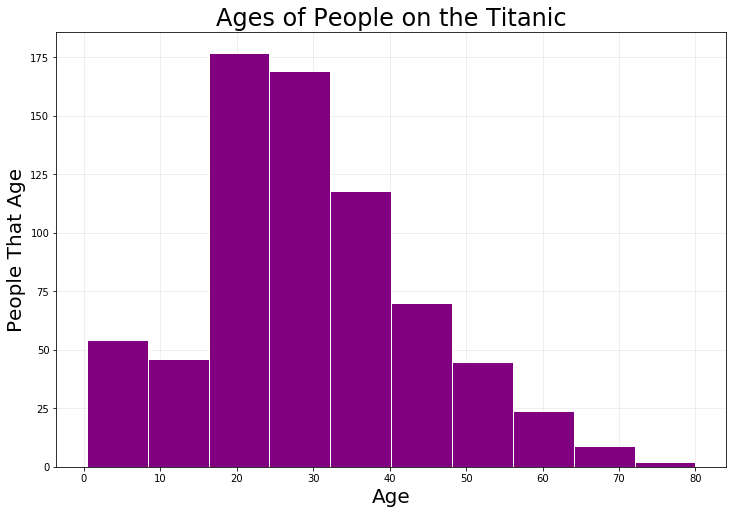

In [212]:
#Following the structure of the Histogram on Notebook 3 Exercise I:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
dfTitanic.hist(column="Age", bins=10,ax=axes,facecolor="purple", edgecolor="white")
axes.set_title("Ages of People on the Titanic", fontsize=24)
axes.set_xlabel("Age", fontsize=20)
axes.set_ylabel("People That Age", fontsize=20)
axes.grid(alpha=0.25)
axes.set_axisbelow(True)
print("The age has a positive skew, having much more young people than old")
print("The graph is also Unimodal. as that sliver around age 0 does not seem significant enough to be considered another hump")
print("A heavy number of young adults took this trip, their numbers trumping teenagers and people 40+ at over double the 40+'s number")

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [241]:
#---------Call to read table, done once instead of lots--------------
survived=dfTitanic.loc[(dfTitanic["Sex"]=="female")&(dfTitanic["Survived"]==1),"Age"]
dead=dfTitanic.loc[(dfTitanic["Sex"]=="female")&(dfTitanic["Survived"]==0),"Age"]

#--------------------Means and Medians--------------------------
meanSurvived=survived.mean()
medianSurvived=survived.median()
meanDead=dead.mean()
medianDead=dead.median()

#-----------------Displaying Means and Medians------------------
print("Mean of the Living: {}".format(meanSurvived))
print("Median of the Living: {}".format(medianSurvived))
print("Mean of the Dead: {}".format(meanDead))
print("Median of the Dead: {}".format(medianDead))

#-----------------My Commentary on the Situation--------------
print("The median of the ages of the living were lower than that of the dead, but the means are very        similar.")
print("It is likely that this is a class issue rather than a chivalry, as Part D showed most non-3rd class  women survived")

Mean of the Living: 28.40558510638298
Median of the Living: 26.0
Mean of the Dead: 28.922063492063494
Median of the Dead: 29.0
The median of the ages of the living were lower than that of the dead, but the means are very        similar.
It is likely that this is a class issue rather than a chivalry, as Part D showed most non-3rd class  women survived


**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

I would say both class warfare and male chivalry were strong factors in the final hours of the Titanic.

Male Chivalry is easier to show, so I will start there. Looking at part D, it is clearly apparent. Both class 1 and 2 had female survival rates above 90%, where the male populations of those groups never got above 40%. Class 3 further shows this, as even though their numbers are lower overall, over half of women survived while just barely 10% of men in that class survived. In all classes there were also more men than women, of course, but the fact that women survived disproportionately more shows there was some male chivalry at play.

Class warfare was also prevalent in the Titanic. Looking at survival rates of women again, classes 1 and 2 had over 90% survival while class 3 only passed half by a pretty small margin. As for men, classes 2 and 3 held a similar survival rate between 10 and 20 percent, but class 1 doubles that at nearly 40%. Seems like the rich folk used their power to survive. In another interesting twist, part F showed that the ages of women who lived and who died were at a really similar level. This could be brushed away as representing the sheer amount of people under 40, but I feel like it would also be fair to point to this as showing bias, as even with male chivalry, the titanic is usually portrayed as pulling the younger women first, which would logically skew the death age older. However, it is likely that more older women were allowed aboard life boats with their first-class husbands, which could have skewed the data in terms of age.

As such, it is very likely both items had some level of play in the final hours of the Titanic

### Problem 5 - Dirty Data
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [182]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [200]:
#Literally just checks for the designated unknowns
dfBabies=df.loc[(df["weight"]!=999)&(df["gestation"]!=999)&(df["smoke"]!=9)&(df["height"]!=99)&(dfBabies["parity"]!=9)&(dfBabies["bwt"]!=999)]

**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

(30, 180)

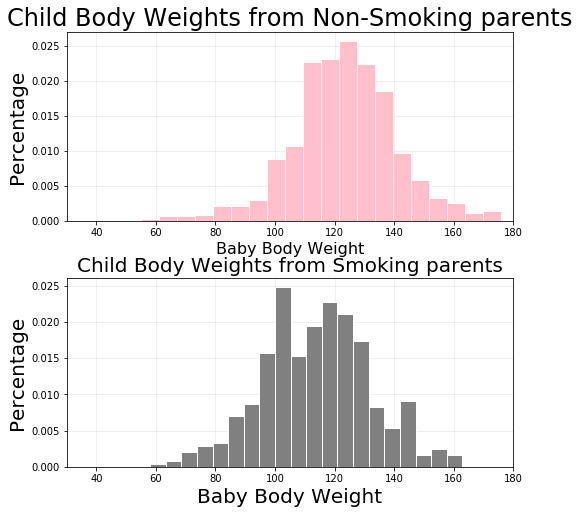

In [217]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

#---------------------Non-Smokers---------------------------------------------
dfBabies.loc[dfBabies["smoke"]==0].hist(column="bwt",density=True,bins=20,ax=axes[0],facecolor="pink", edgecolor="white")
axes[0].set_title("Child Body Weights from Non-Smoking parents", fontsize=24)
axes[0].set_xlabel("Baby Body Weight", fontsize=16)
axes[0].set_ylabel("Percentage", fontsize=20)
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)
axes[0].set_xlim([30,180])

#----------------------Smokers-------------------------------------------------
dfBabies.loc[dfBabies["smoke"]==1].hist(column="bwt",density=True, bins=20, ax=axes[1],facecolor="gray", edgecolor="white")
axes[1].set_title("Child Body Weights from Smoking parents", fontsize=20)
axes[1].set_xlabel("Baby Body Weight", fontsize=20)
axes[1].set_ylabel("Percentage", fontsize=20)
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)
axes[1].set_xlim([30,180])

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

Non-smokers seem to have a more stable range between 110 and 130 ounces in a unimodal distribution. The children of smokers, on the other hand, have weight shifting more toward 110 ounces with a staggering number around the 100 ounce mark and below

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [220]:
#Means and medians. I probably should fix this like the other one like this to only call each once,
#But I did this days earlier
nonMean=dfBabies.loc[dfBabies["smoke"]==0,"bwt"].mean()
nonMedian=dfBabies.loc[dfBabies["smoke"]==0,"bwt"].median()
smokeMean=dfBabies.loc[dfBabies["smoke"]==1,"bwt"].mean()
smokeMedian=dfBabies.loc[dfBabies["smoke"]==1,"bwt"].median()

#----------------------------Displaying Means and Medians-------------
print("Mean for non-smokers is: {}".format(nonMean))
print("Median for non-smokers is: {}".format(nonMedian))
print("Mean for smokers is: {}".format(smokeMean))
print("Mean for smokers is: {}".format(smokeMedian))

#--------------------------Commentary based on means and medians-----------
print("The smoker mean and median are both lower than the non-smoker's by about 10 ounces")
print("It would probably be best not to use mean for birth weight, as there are always going to be the occasional really thin and really fat babies")

Mean for non-smokers is: 123.08531468531469
Median for non-smokers is: 123.0
Mean for smokers is: 113.82391304347826
Mean for smokers is: 115.0
The smoker mean and median are both lower than the non-smoker's by about 10 ounces
It would probably be best not to use mean for birth weight, as there are always going to be the occasional really thin and really fat babies


**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

([<matplotlib.axis.XTick at 0xab15e69b0>,
 <a list of 2 Text xticklabel objects>)

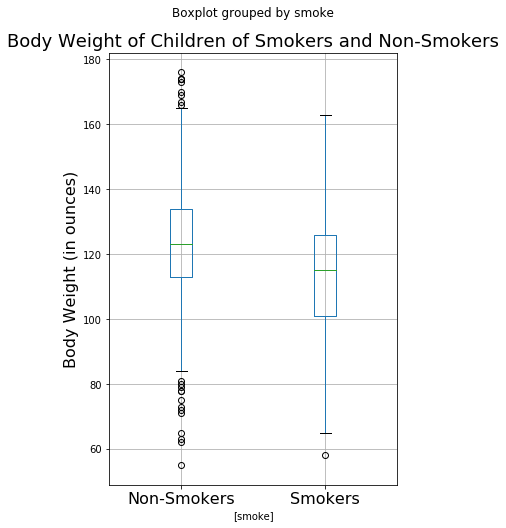

In [238]:
#Following Notebook 3
fig, axes=plt.subplots(figsize=(5,8))

plot=dfBabies.loc[(dfBabies["smoke"]==0) | (dfBabies["smoke"]==1)].boxplot(column=["bwt"],by=["smoke"], ax=axes)


axes.set_title('Body Weight of Children of Smokers and Non-Smokers', fontsize=18)
axes.set_ylabel("Body Weight (in ounces)", fontsize=16)

plt.xticks([1,2],["Non-Smokers", "Smokers"], rotation=0, fontsize=16)


**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

Here, we will assume the non-smoker is the base case. There are always other factors that could affect such a measurement like weight, but for this sake, it should be fair to assume Non-smoker weights are what the child should be. Looking at the non-smoker categoty, we have a clear center of regular weights with many variations in the form of outliers. Once again, there are other circumstances that could lead to a big baby or a small one, but there is a clear normal centered near 120 oz.

As for the smoker line, the first thing to notice is the weight being centered below the 120 mark by a fair margin. The whiskers also stretch further. The two graphs' whiskers reach a similar peak, yes, but there is nothing above that for the smokers, implying that the biggest baby size is still relatively normal sized. On the other end, however, the low end of the normal range is nearly 20 ounces lower. 20 oz is a large amount to be small, and the data is saying that is normal for a smoker's baby. Of course, the lowest point overall is not as low as the lowest on the non-smoker's, but we cannot rely on one factor to tell all. However, in terms of the weights of the babies in general of the sample given, this is saying that a child is highly likely to be smaller than he/she would be if the parent did not smoke. Smoking can cause other problems and should not be taken lightly as just a size manipulator, but the fact that a mother smoking can lead to the child being as much as 20 ounces smaller on average really shows the big effects of the tiny tobacco stick.